In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas as hvplot

In [2]:
# Import csv files on number of crimes committed in NYC
#Verified file_path works (in markdown)

file_path = Path(r"C:\Users\ppate\NYPD_Arrests_Data__Historic__2017.csv")
file_path_2 = Path(r"C:\Users\ppate\NYPD_Arrest_Data__Year_to_Date_.csv")
file_path_3 = Path(r"C:\Users\ppate\2023_NYPD_Arrest_Data__Year_to_Date.csv")

#if file_path.exists():
    #print("File exists!")

In [4]:
# Turn the csv files into a dataframe using pandas, and then merge all three 
# dataframes into one
first_df = pd.read_csv(file_path)
second_df = pd.read_csv(file_path_2)
third_df = pd.read_csv(file_path_3)


data = [first_df, second_df, third_df]
nyc_arrest = pd.concat(data)
nyc_arrest

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,New Georeferenced Column
0,203575866,1/2/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,B,44,1.0,45-64,M,BLACK,1006032,243764,40.835733,-73.921285,POINT (-73.92128542599994 40.83573258000007),NaN
1,205273292,1/2/2017,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,B,46,0.0,25-44,M,WHITE HISPANIC,1012545,252687,40.860205,-73.897711,POINT (-73.897711041 40.86020510700008),NaN
2,204473933,1/3/2017,508.0,"DRUG PARAPHERNALIA, POSSESSE",235.0,DANGEROUS DRUGS,PL 2205002,M,K,84,0.0,65+,M,WHITE HISPANIC,988309,190905,40.690674,-73.985365,POINT (-73.98536490099997 40.69067418100008),NaN
3,203068773,1/3/2017,503.0,"CONTROLLED SUBSTANCE,INTENT TO",117.0,DANGEROUS DRUGS,PL 2201601,F,B,52,0.0,45-64,M,BLACK,1019388,259017,40.877554,-73.872939,POINT (-73.87293947099994 40.87755442800005),NaN
4,205616936,1/4/2017,273.0,"TAMPERING 1,CRIMINAL",121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1452000,F,K,84,1.0,25-44,M,BLACK,988089,190305,40.689027,-73.986159,POINT (-73.98615855199995 40.689027417000034),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170090,270955727,07/07/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,B,52,0.0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,NaN,POINT (-73.8806 40.869067)
170091,273117887,08/18/2023,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,B,47,0.0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,NaN,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,09/13/2023,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,122,0.0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,NaN,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,06/15/2023,490.0,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,62,0.0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,NaN,POINT (-74.00281242 40.60020423)


In [5]:
print(nyc_arrest.columns)

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat',
       'New Georeferenced Column'],
      dtype='object')


In [9]:
# Drop unrelevant columns

nyc_arrests = nyc_arrest.drop(
    ["ARREST_KEY", 
     "PD_CD", 
     "PD_DESC",
     "KY_CD", 
     "LAW_CODE", 
     "LAW_CAT_CD",
     "JURISDICTION_CODE",
     "New Georeferenced Column", 
     "X_COORD_CD", 
     "Y_COORD_CD",
     "Lon_Lat"],
    axis = 1)
nyc_arrests

,ARREST_DATE,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,1/2/2017,OTHER OFFENSES RELATED TO THEF,B,44,45-64,M,BLACK,40.835733,-73.921285
1,1/2/2017,FORGERY,B,46,25-44,M,WHITE HISPANIC,40.860205,-73.897711
2,1/3/2017,DANGEROUS DRUGS,K,84,65+,M,WHITE HISPANIC,40.690674,-73.985365
3,1/3/2017,DANGEROUS DRUGS,B,52,45-64,M,BLACK,40.877554,-73.872939
4,1/4/2017,CRIMINAL MISCHIEF & RELATED OF,K,84,25-44,M,BLACK,40.689027,-73.986159
...,...,...,...,...,...,...,...,...,...
170090,07/07/2023,ROBBERY,B,52,25-44,M,BLACK,40.869067,-73.880600
170091,08/18/2023,SEX CRIMES,B,47,25-44,F,BLACK,40.887314,-73.847272
170092,09/13/2023,OTHER TRAFFIC INFRACTION,S,122,25-44,M,WHITE HISPANIC,40.610087,-74.116666
170093,06/15/2023,POSSESSION OF STOLEN PROPERTY,K,62,25-44,M,BLACK,40.600204,-74.002812


In [13]:
# Created a new column stating the year the crime was committed, then dropped 
#the original "ARREST_DATE" column. This should help create visuals based 
#on the year. 

nyc_arrests['ARREST_DATE'] = pd.to_datetime(nyc_arrests['ARREST_DATE'])
nyc_arrests['Year'] = nyc_arrests['ARREST_DATE'].dt.strftime('%Y')
#nyc_arrests

final_df = nyc_arrests.drop(["ARREST_DATE"], axis = 1)
final_df


,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Year
0,OTHER OFFENSES RELATED TO THEF,B,44,45-64,M,BLACK,40.835733,-73.921285,2017
1,FORGERY,B,46,25-44,M,WHITE HISPANIC,40.860205,-73.897711,2017
2,DANGEROUS DRUGS,K,84,65+,M,WHITE HISPANIC,40.690674,-73.985365,2017
3,DANGEROUS DRUGS,B,52,45-64,M,BLACK,40.877554,-73.872939,2017
4,CRIMINAL MISCHIEF & RELATED OF,K,84,25-44,M,BLACK,40.689027,-73.986159,2017
...,...,...,...,...,...,...,...,...,...
170090,ROBBERY,B,52,25-44,M,BLACK,40.869067,-73.880600,2023
170091,SEX CRIMES,B,47,25-44,F,BLACK,40.887314,-73.847272,2023
170092,OTHER TRAFFIC INFRACTION,S,122,25-44,M,WHITE HISPANIC,40.610087,-74.116666,2023
170093,POSSESSION OF STOLEN PROPERTY,K,62,25-44,M,BLACK,40.600204,-74.002812,2023


In [18]:
# Create a Boolean mask for the rows to remove data from 2017. There is not
#enough data from that year for it to be accurate

mask = final_df['Year'] == '2017'
df = final_df[~mask]
df

,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Year
34041,BURGLARY,M,33,25-44,M,BLACK HISPANIC,40.840784,-73.936253,2018
34042,DANGEROUS WEAPONS,B,40,25-44,M,WHITE,40.816981,-73.921152,2018
34043,SEX CRIMES,Q,115,45-64,M,WHITE HISPANIC,40.756861,-73.875657,2018
34044,BURGLARY,M,14,45-64,M,BLACK,40.753464,-73.994400,2018
34045,CRIMINAL TRESPASS,K,63,45-64,M,BLACK,40.630005,-73.944675,2018
...,...,...,...,...,...,...,...,...,...
170090,ROBBERY,B,52,25-44,M,BLACK,40.869067,-73.880600,2023
170091,SEX CRIMES,B,47,25-44,F,BLACK,40.887314,-73.847272,2023
170092,OTHER TRAFFIC INFRACTION,S,122,25-44,M,WHITE HISPANIC,40.610087,-74.116666,2023
170093,POSSESSION OF STOLEN PROPERTY,K,62,25-44,M,BLACK,40.600204,-74.002812,2023


<Axes: title={'center': 'Number of Arrests from 2018 - 2023'}, xlabel='Year'>

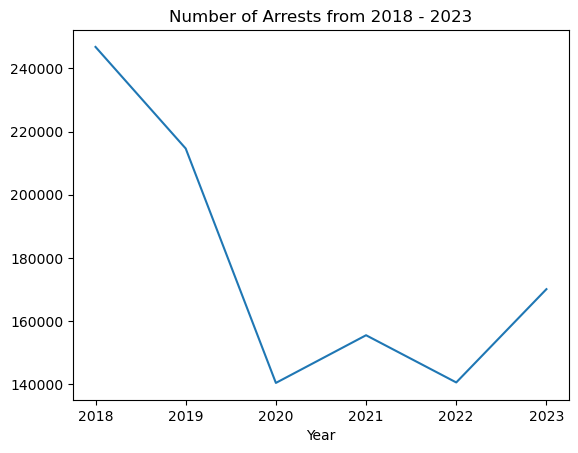

In [23]:
#Plot a bar graph showing number of arrests from 2018 - 2023
arrest_count = df["Year"].groupby(df["Year"]).agg('count')

arrest_count.plot.line(
    title = "Number of Arrests from 2018 - 2023")